In [35]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

fitted alpha value: 0.0146


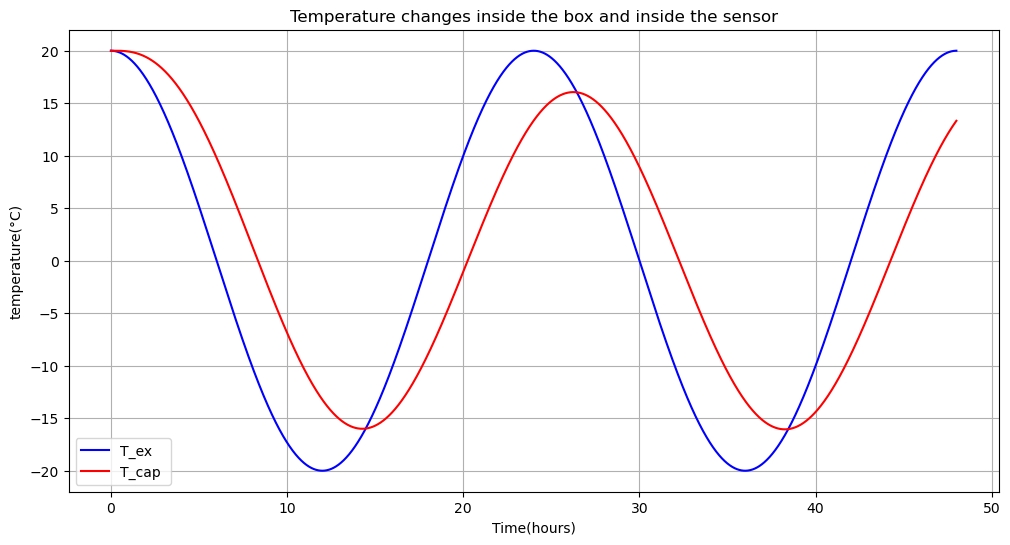

In [37]:
delta_max_ex = 20  
phi = 0  
alpha_initial = 0.1  
thickness = 0.01  
k_box = 50  # Thermal conductivity (W/m·K)
rho_box = 7850  
cp_box = 500  
alpha_diff = k_box / (rho_box * cp_box)  
total_time = 48  # hours
dt = 0.01 
num_steps = int(total_time / dt)
num_cells = 15  
dx = thickness / num_cells  

# check the stability
#if alpha_diff * dt / dx**2 > 0.5:
    #raise ValueError("Unstable：please change dt or dx")

T_ex = np.zeros(num_steps)  
T_in = np.zeros((num_steps, num_cells + 1))  
time = np.arange(num_steps) * dt

T_ex = delta_max_ex * np.cos(2 * np.pi * time / 24)
T_in[0, :] = T_ex[0]  
for n in range(0, num_steps - 1):
    for i in range(1, num_cells): 
        T_in[n + 1, i] = T_in[n, i] + (alpha_diff * dt / (dx**2)) * (T_in[n, i + 1] - 2 * T_in[n, i] + T_in[n, i - 1])

    T_in[n + 1, 0] = T_ex[n + 1]  # Boundary conditions
    T_in[n + 1, -1] = T_in[n + 1, -2]  
T_cap = T_in[:, num_cells // 2]  

def model_func(t, alpha_fit):
    return delta_max_ex * np.cos(2 * np.pi * t / 24 - alpha_fit * t + phi) * np.exp(-alpha_fit * t)

popt, pcov = curve_fit(model_func, time, T_cap, p0=[alpha_initial])
fitted_alpha = popt[0]

print(f"fitted alpha value: {fitted_alpha:.4f}")
plt.figure(figsize=(12, 6))
plt.plot(time, T_ex, label='T_ex ', color='blue')
plt.plot(time, T_cap, label='T_cap ', color='red')
plt.xlabel('Time(hours)')
plt.ylabel('temperature(°C)')
plt.title('Temperature changes inside the box and inside the sensor')
plt.legend()
plt.grid()
plt.show()
